## Лабораторна робота. Лінійна регресія

1.Використовуючи дані з файлу 'student_scores.csv' побудуйте модель простої регресії для знаходження залежності між значеннями тривалості навчання і середнього балу студентів.
Оцінити якість отриманої регресії.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('student_scores.csv', delimiter=',')

In [4]:
# розділення даних на залежну (y) та незалежну (x) змінні
X = data['Hours'].values.reshape(-1, 1)
y = data['Scores'].values

# розділення даних на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# створення моделі лінійної регресії
linmodel = LinearRegression()

# навчання моделі на тренувальних даних
linmodel.fit(X_train, y_train)

# прогноз на тестових даних
y_predict = linmodel.predict(X_test)

# виведення результату фітингу моделі лінійної регресії на тестових даних
print(pd.DataFrame({'Actual data': y_test, 'Predicted data': y_predict}))

# створення моделі лінійної регресії та виведення коефіціентів отриманої моделі
print('Intercept:', linmodel.intercept_)
print('Coeff:', linmodel.coef_)

# оцінювання якості моделі за допомогою метрик R2 та MSE
r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
print('R2:', r2)
print('MSE:', mse)


   Actual data  Predicted data
0           20       16.884145
1           27       33.732261
2           69       75.357018
3           30       26.794801
4           62       60.491033
Intercept: 2.0181600414346974
Coeff: [9.91065648]
R2: 0.9454906892105355
MSE: 21.598769307217406


Висновки: Коефіцієнт показує, яка частина загальної варіативності змінної пояснюється варіативністю незалежних змінних. Якщо  високий (тобто наближається до 1), то модель добре адаптується до даних. Значення MSE показує середньо-квадратичну помилку моделі.


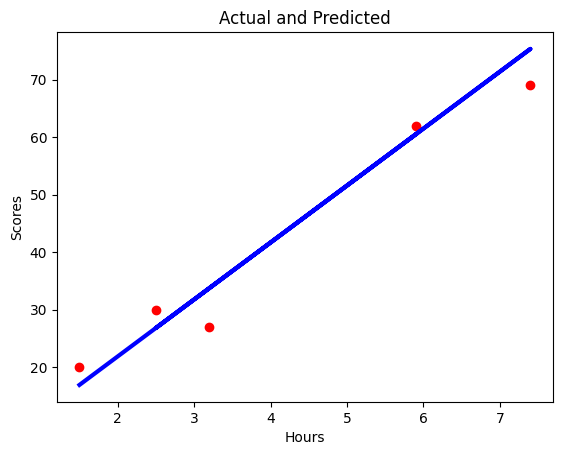

In [5]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_predict, color='blue', linewidth=3)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Actual and Predicted')
plt.show()

In [6]:
# оцінка якості моделі за допомогою метрик R2 та MSE
print('R2 Score:', r2)
print('Mean Squared Error:', mse)

# виведення оцінки якості моделі
print('Evaluation of Model :')
if r2 >= 0.7:
    print('Its a great model')
elif r2 >= 0.5:
    print('Its normal model')
else:
    print('Its a bad Model')

R2 Score: 0.9454906892105355
Mean Squared Error: 21.598769307217406
Evaluation of Model :
Its a great model


2. Використовуючи дані з файлу 'petrol_consumption.csv' побудуйте модель множинної регресії для знаходження залежності між значеннями споживання бензину і похідними факторами.
Оцінити якість отриманої регресії.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# завантаження даних з файлу csv
data = pd.read_csv('petrol_consumption.csv')

In [2]:
# визначення ознак та цільової змінної
X = data[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y = data['Petrol_Consumption']

# розділення даних на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# навчання моделі множинної регресії на тренувальній вибірці. Виведення коефеціентів отриманої моделі
model = LinearRegression()
model.fit(X_train, y_train)

print('Coeff:', model.coef_)
print('Inter:', model.intercept_)

# прогноз на тестовій вибірці
y_pred = model.predict(X_test)

# обчислення коефіцієнт детермінації R² для оцінки якості моделі
r2 = r2_score(y_test, y_pred)
print('R2:', r2)

Coeff: [-4.00166602e+01 -6.54126674e-02 -4.74073380e-03  1.34186212e+03]
Inter: 425.59933220324206
R2: 0.20361932410121653


Висновки щодо значення коефіцієнта детермінації R²: R2 низький, тобто модель може бути недостатньо адекватною

In [8]:
# обчислення Mean Squared Error, Mean Absolute Error, Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 4666.344787588368
Mean Absolute Error: 56.82224747896472
Root Mean Squared Error: 68.31064915215173


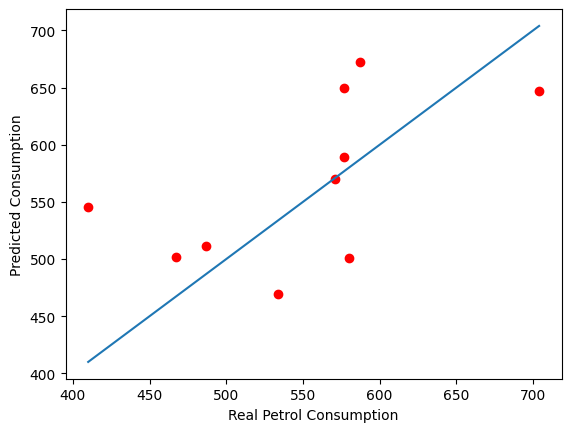

In [9]:
# Візуалізація даних та регресії
plt.scatter(y_test, y_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel('Real Petrol Consumption')
plt.ylabel('Predicted Consumption')
plt.show()